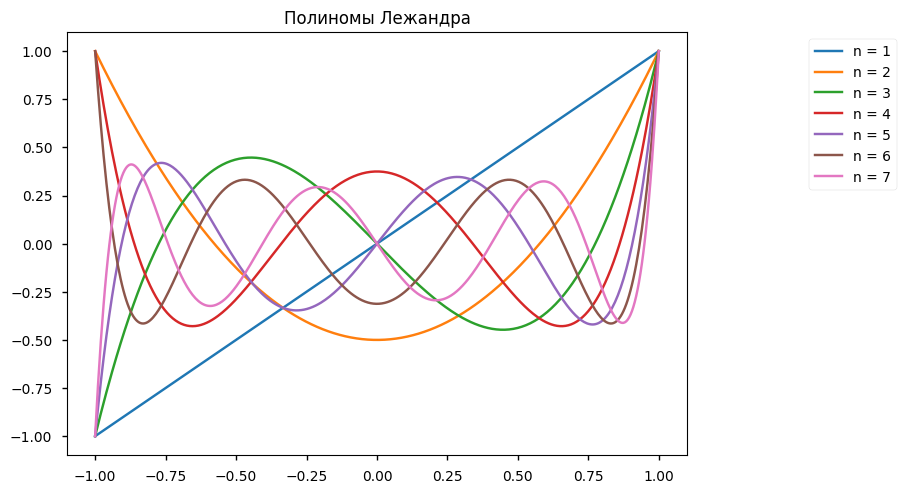

In [18]:
%matplotlib inLine
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmn
from scipy.special import eval_legendre
plt.style.use('seaborn-v0_8-notebook')

x = np.linspace(-1, 1, 400)

fig, ax = plt.subplots()
ax.set_title('Полиномы Лежандра')

for n in range(1, 8):
    Pn = eval_legendre(n, x)
    ax.plot(x, Pn, label=f'n = {n}')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.35, 1))

plt.show()

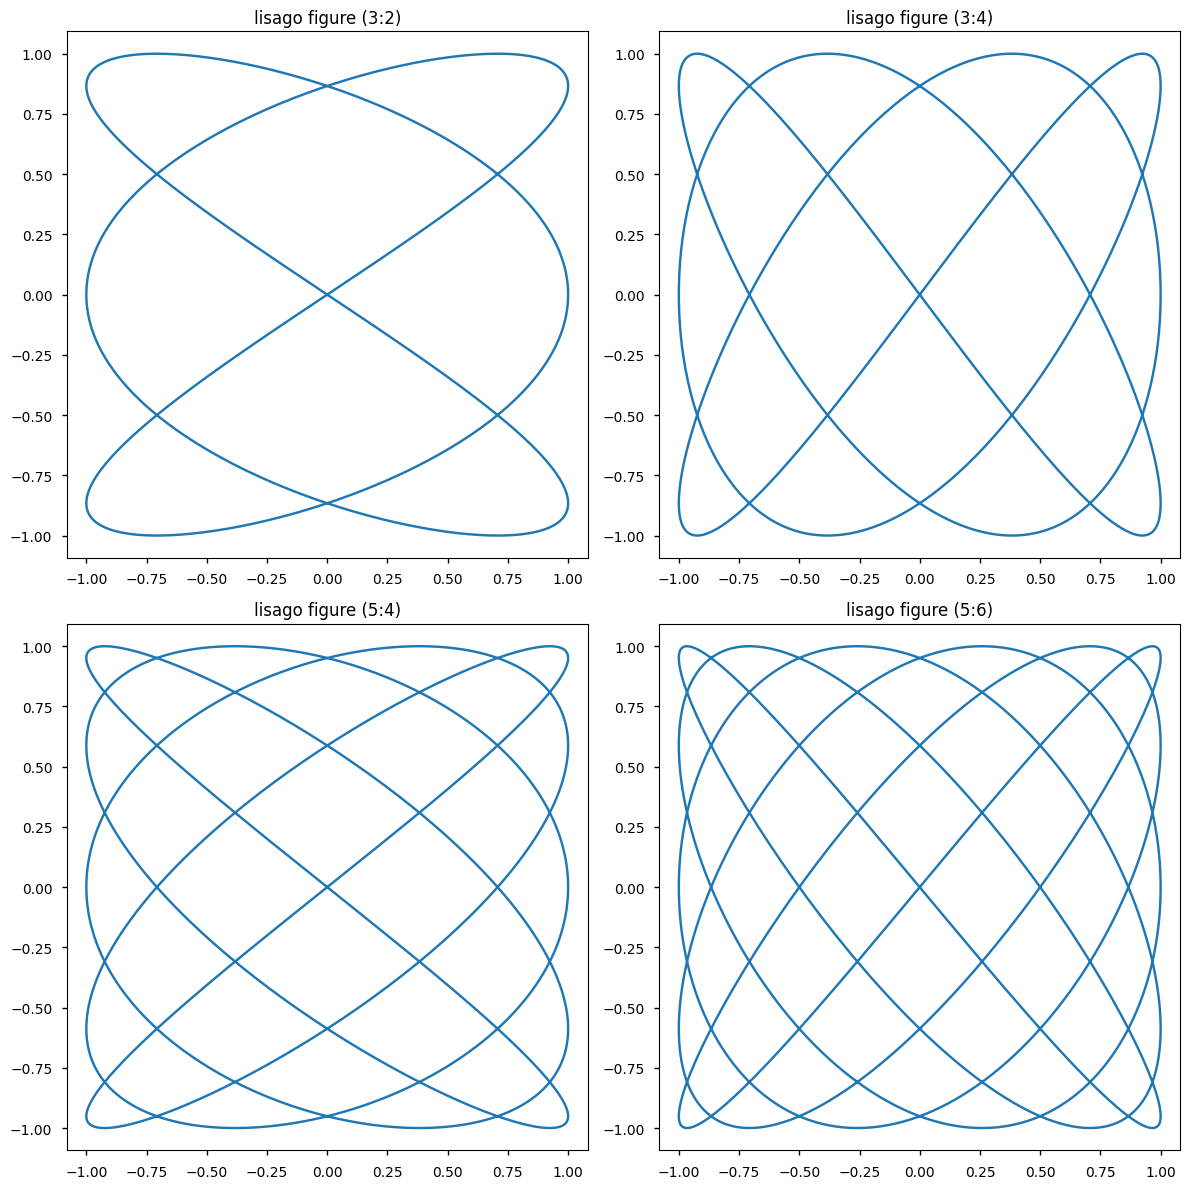

In [19]:
%matplotlib inLine
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-notebook')

def lisago_figure(a, b, delta):
    t = np.linspace(0, 2*np.pi, 1000)
    x = np.sin(a*t + delta)
    y = np.sin(b*t)
    return x, y

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for ax, (a, b) in zip(axs.flat,[(3, 2),(3, 4),(5, 4),(5, 6)]):
    x, y = lisago_figure(a, b, 0)
    ax.plot(x, y)
    ax.set_title(f'lisago figure ({a}:{b})')
    ax.axis('equal')

plt.tight_layout()
plt.show()

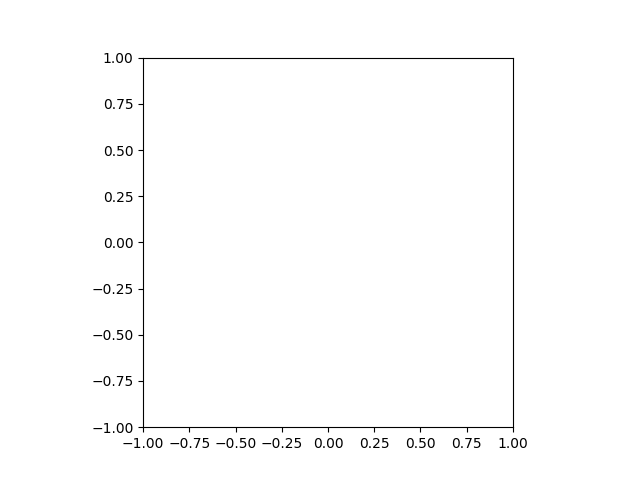

In [3]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def lissajous(A, B, a, b, delta, t):
    x = A * np.sin(a * t + delta)
    y = B * np.sin(b * t)
    return x, y

A = 1
B = 1
delta = 0
t = np.linspace(0, 2 * np.pi, 1000)

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(-A, A)
ax.set_ylim(-B, B)
ax.set_aspect('equal', 'box')

def init():
    line.set_data([], [])
    return line,

def animate(frame):
    ratio = frame / 100  
    a = 1 + 2 * ratio  
    b = 1 + 1 * ratio  
    x, y = lissajous(A, B, a, b, delta, t)
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)

plt.show()

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def sum_of_waves(amp1=1.0, freq1=1.0, amp2=1.0, freq2=1.0):
    x = np.linspace(0, 2*np.pi, 1000)
    
    wave1 = amp1 * np.sin(freq1 * x)
    wave2 = amp2 * np.sin(freq2 * x)
    
    total_wave = wave1 + wave2
    
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.plot(x, wave1, label='Wave 1')
    plt.title('Wave 1')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(x, wave2, label='Wave 2')
    plt.title('Wave 2')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(x, total_wave, label='Sum of Waves')
    plt.title('Sum of Waves')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

interact(sum_of_waves, 
         amp1=FloatSlider(min=0.1, max=2, step=0.1, value=1.0, description='Amplitude 1'),
         freq1=FloatSlider(min=0.1, max=2, step=0.1, value=1.0, description='Frequency 1'),
         amp2=FloatSlider(min=0.1, max=2, step=0.1, value=1.0, description='Amplitude 2'),
         freq2=FloatSlider(min=0.1, max=2, step=0.1, value=1.0, description='Frequency 2'))

interactive(children=(FloatSlider(value=1.0, description='Amplitude 1', max=2.0, min=0.1), FloatSlider(value=1…

<function __main__.sum_of_waves(amp1=1.0, freq1=1.0, amp2=1.0, freq2=1.0)>

C:\Users\study\AppData\Local\Temp\ipykernel_10876\418863739.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_yscale('log')


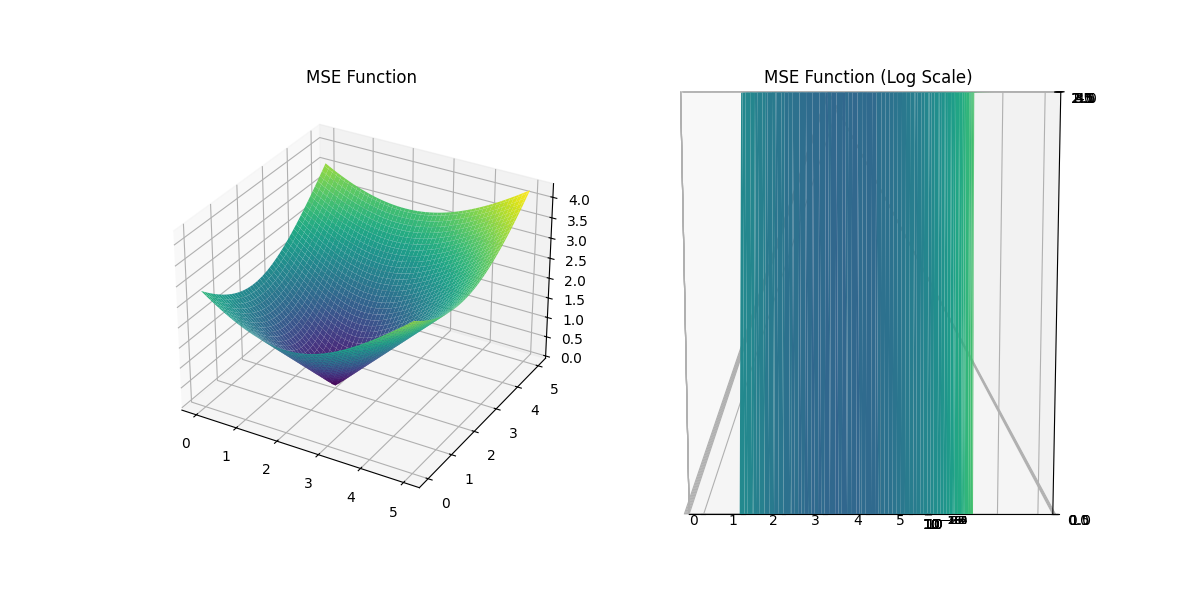

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt((X - 2)**2 + (Y - 2)**2)  


Z = Z + 1e-10  


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('MSE Function')


ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax2.set_yscale('log')
ax2.set_title('MSE Function (Log Scale)')

plt.show()